# Tutorial 3 at NTU: PCA

In [3]:
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sys
import os
from sklearn.decomposition import PCA

## 1. Introduction

Principal Component Analysis is a traditional multivariate statistical technique for dimension or variable reduction. 

It aims to find linear combinations of original variables such that the information in the original data is preserved.

### 1.1 Objective

The principal components are those uncorrelated linear combinations $y_1, \cdots, y_p$ whose variances are as large as possible.
 
Remark: $\mathbf{y}$ is often referred to as the transformed data matrix of $\mathbf x$, where $\mathbf x$ is projected onto the new set of principal components (eigenvectors)

### 1.2 Setting

Let the random vector $\mathbf x = (x_1, \cdots, x_p)^\top$ have the covariance matrix $\mathbf \Sigma$ with eigenvalues $\lambda_1 \geq \lambda_2 \geq \cdots \geq 0$. Consider the linear combinations
\begin{equation*}
	\mathbf y := \left(\begin{array}{c}
		y_1	\\	\vdots	\\	y_p
	\end{array}\right) = \left(\begin{array}{c}
		\mathbf a_1^\top \mathbf x \\ \vdots \\ \mathbf a_p^\top \mathbf x
	\end{array}\right) = \mathbf A \mathbf x \, .
\end{equation*}
Then, for $i,j=1,2,\cdots,p$, we have
\begin{align*}
	{\rm Var}(y_i) &= {\rm Var}(\mathbf a_i^\top \mathbf x) = \mathbf a_i^\top \mathbf \Sigma \mathbf a_i \, , \\
	{\rm Cov}(y_i, y_j) &= {\rm Cov}(\mathbf a_i^\top \mathbf x, \mathbf a_j^\top \mathbf x) = \mathbf a_i^\top \mathbf \Sigma \mathbf a_j \, .
\end{align*}

<u>Thinking</u>

But why do we need to maximize the variance and what can this achieve? Why maximized variance helps preserve the information?

### 1.3 Properties of Principal Components

Let $\mathbf \Sigma$ be the covariance matrix associated with the random vector $\mathbf x^\top = (x_1, \cdots, x_p)^\top$. 

Let $\mathbf \Sigma$ have the normalized eigenvalue-eigenvector pairs $(\lambda_1, \mathbf e_1 ), \cdots, (\lambda_p, \mathbf e_p)$, where $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p \geq 0$. 

Then the $i$-th principal component is given by
\begin{equation*}
	y_i = \mathbf e_i^\top \mathbf x = e_{i1} x_1 + e_{i2} x_2 + \cdots + e_{ip} x_p \, , \qquad i=1,2, \cdots, p \, ,
\end{equation*}
with
\begin{alignat*}{2}
	{\rm Var}(y_i) &= \mathbf e_i^\top \mathbf \Sigma \mathbf e_i = \lambda_i \, , \qquad &&i=1,2, \cdots, p \, , \\
	{\rm Cov}(y_i, y_j) &= \mathbf e_i^\top \mathbf \Sigma \mathbf e_j = 0 \, , \qquad &&i \neq j \, .
\end{alignat*}
If some $\lambda_i$'s are equal, the choices of the corresponding coefficient vectors, $\mathbf e_i$, and hence $y_i$, are not unique.

<u>Remark:</u>

$\mathbf e_i^\top\mathbf e_j = 0,\, \text{for $i\neq j$}$

Why is this true? What is the relationship between it and $Cov(y_i, y_j)=0$? Try to argue and prove yourself.

\
The above process is actually <b>spectral decomposition</b>:

 
Given a square and symmetric matrix A, then it can be decomposed into $A = QDQ^{\top}$, 

$Q$ is the matrix where each column is an eigenvector of $A$ ($Q$ is an orthogonal matrix since $A$ is symmetric), 

$D$ is a diagonal matrix where the diagonal entries are the eigenvalues of $A$.

### 1.4 Fitting Data with SVD

Given demeaned data $\mathbf{X_{T \times p}}$, via PCA, we can $r$-rank approximate as:

\begin{equation*}
\mathbf{\tilde{X}_{T \times p}} = \mathbf{U}_{T \times r} \mathbf{\Sigma}_{r \times r} \mathbf{V}^*_{r \times p} = \sum_{k=1}^{r} \sigma_i \mathbf{u}_i \mathbf{v}_i^*
\end{equation*}

$\mathbf{\Sigma}$ contains the <b>singular values</b> of $\mathbf X$, which is the same as the square root of eigenvalues of $\mathbf {X^T X}$.

## 2. Application

### 2.1 Approximation of Portfolio V@R

We need the standard deviation of the loss in a portfolio to compute the $V@R$ of that portfolio. 

Let the change in the portfolio value be $\Delta P=w^\top x=w_1x_1+ \ldots + w_p x_p$ 

and we can approximate $\Delta P$ by using the first $m$ PCs of $x$ as follows (with $p >> m$):

\begin{align*} 
	\Delta P  &= w^\top x \approx w_1(h_{11}y_1+ \ldots +h_{1m}y_m + \epsilon_1)+ \ldots + w_p(h_{p1}y_1+ \ldots +h_{pm}y_m + \epsilon_p) &\\
	&= (w_1h_{11}+ \ldots + w_p h_{p1})y_1 +\ldots + (w_1 h_{1m} + \ldots +w_ph_{pm})y_m + (w_1 \epsilon_{1} + \ldots + w_p \epsilon_{p})\\
	&=: \delta_1 y_1+\ldots + \delta_m y_m + \epsilon, &
\end{align*}

where $\delta_k = \sum_{i=1}^p w_i h_{ik}$, for $k=1,2,\ldots,m$ and $\epsilon = \sum_{i=1}^p w_i \epsilon_i$ (idiosyncratic risk not captured by factors). 

The $N$-day 99\% $V@R$ of $\Delta P$ is $z_{0.99}\sqrt{N Var (\Delta P)}$, we can just use the first $m$ PCs to approximate the variance of $\Delta P$,

$$Var(\Delta P) \approx \delta_1^2 Var(y_1)+ \cdots + \delta_m^2 Var(y_m)=\delta_1^2 \lambda_1+ \cdots +\delta_m^2 \lambda_m.$$

This expression is much simpler due to the fact that all PCs are orthogonal and maintain a large portion of the variance contained in $x$.

\
<u>Note</u> 

If the unexplained variance $\epsilon$ is in fact large (let's say $\ge 10 \%$ of total variance), then we can use the following fact:

\begin{equation*} 
    Var(\epsilon_i) = Var(x_i) - \sum_{k=1}^m h_{ik}^2 \lambda_k , \qquad i=1,2, \cdots, p
\end{equation*}


By assuming independence of $\epsilon_i$ and $y_k$:

\begin{equation*} 
    Var(\Delta P) \approx \sum_{k=1}^m \delta_k^2 \lambda_k + \sum_{i=1}^p w_i^2 Var(\epsilon_i)
\end{equation*}

Essentially, we have broken down risk into systematic ($\delta_k$ means factor exposure) and idiosyncratic components. 

### 2.2 Implementation: Stock Trends and Investment

In fact, in finance, one may also employ PCA for dimensionality reduction and find stocks with favorable trends to invest in. 

Specifically, we might figure out the current market trend as PCA decomposes the market views into independent segments.

Hopefully, we can follow the momentum and build a winning portfolio.

#### 2.2.1 Dataset

Below we have the normalized returns of the S&P 500 components from 2020-01-01 to 2020-06-30.

The normalization is done as dividing the raw returns by its rolling 65-day volatility.

In [22]:
rets_norm = pd.read_parquet('rets_norm_covid.parquet')

#### 2.2.2 PCA Eigenvalue and Eigenvectors

In [24]:
n_components = 10
fit_data = rets_norm.clip(-5, 5).fillna(0)

pca_mod = PCA(n_components=n_components)
pca_mod.fit(fit_data)

PCA(n_components=10)

In [25]:
eig_vec = pd.DataFrame(pca_mod.components_, columns=fit_data.columns, index=range(1, n_components + 1))
eig_vec = eig_vec.rename_axis(index='PC').rename_axis(columns='sec')
eig_val = pd.Series(pca_mod.explained_variance_ratio_, index=range(1, n_components + 1))

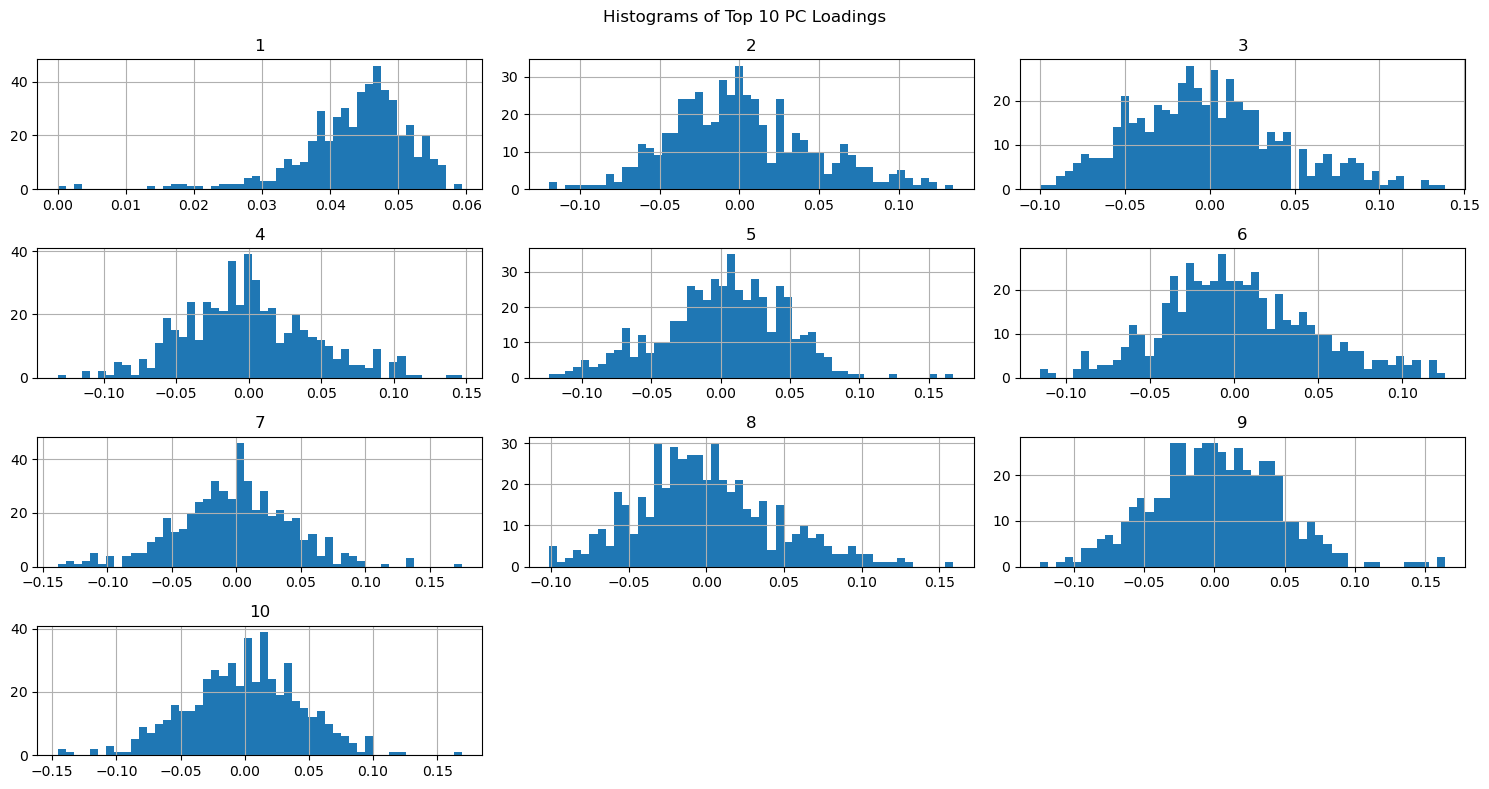

In [26]:
eig_vec.T.hist(layout=(4, 3), figsize=(15, 8), bins=50);
plt.suptitle(f'Histograms of Top {n_components} PC Loadings');
plt.tight_layout()
plt.show()

It is well known that PC1 is the "market", which means to long all stocks.

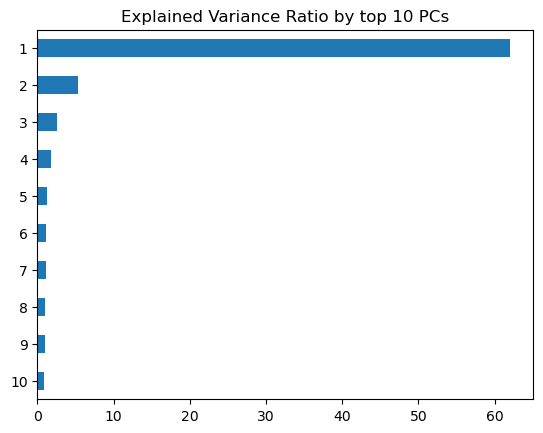

In [28]:
(eig_val * 100).plot.barh(title=f'Explained Variance Ratio by top {n_components} PCs')
plt.gca().invert_yaxis()
plt.show()

Market has $> 60 \%$ variance while PC2 is already $<10 \%$.

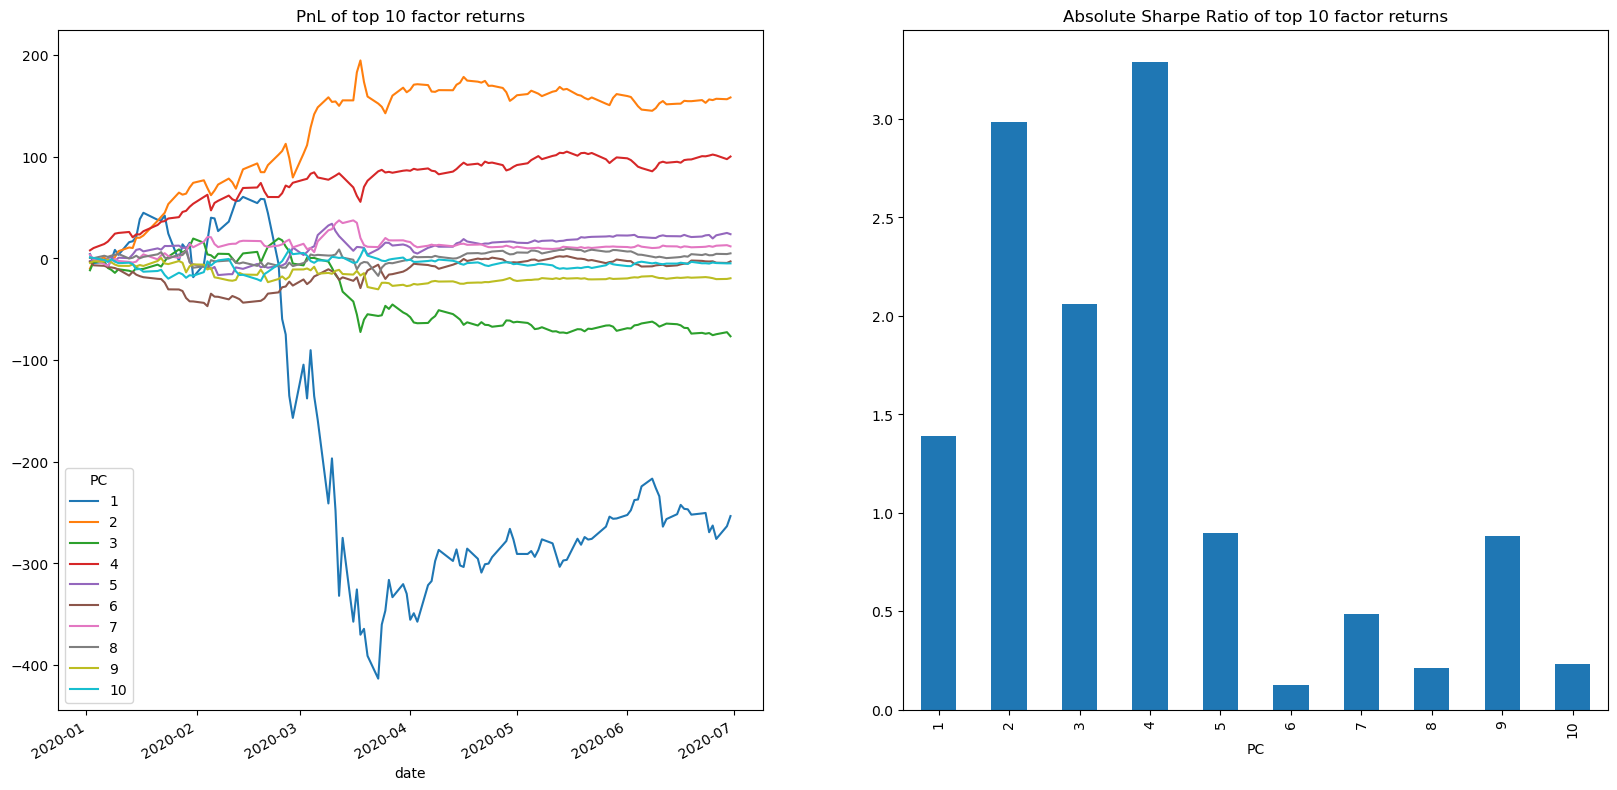

In [30]:
factor_ret = fit_data @ eig_vec.T
factor_sr = factor_ret.mean() / factor_ret.std() * np.sqrt(260)

fig, ax = plt.subplots(1, 2, figsize=(20, 10));

factor_ret.cumsum().plot(ax=ax[0], title=f'PnL of top {n_components} factor returns');
factor_sr.abs().plot.bar(title=f'Absolute Sharpe Ratio of top {n_components} factor returns', ax=ax[1]);

Remark: I plotted out the absolute Sharpe Ratio because PCA is sign invariant.

#### 2.2.3 Sector Analysis on PCA factors

We can classify stocks into different sectors according to GICS.

Let's analyze the most interesting two PCs: PC2 and PC4 as they have a high Sharpe.

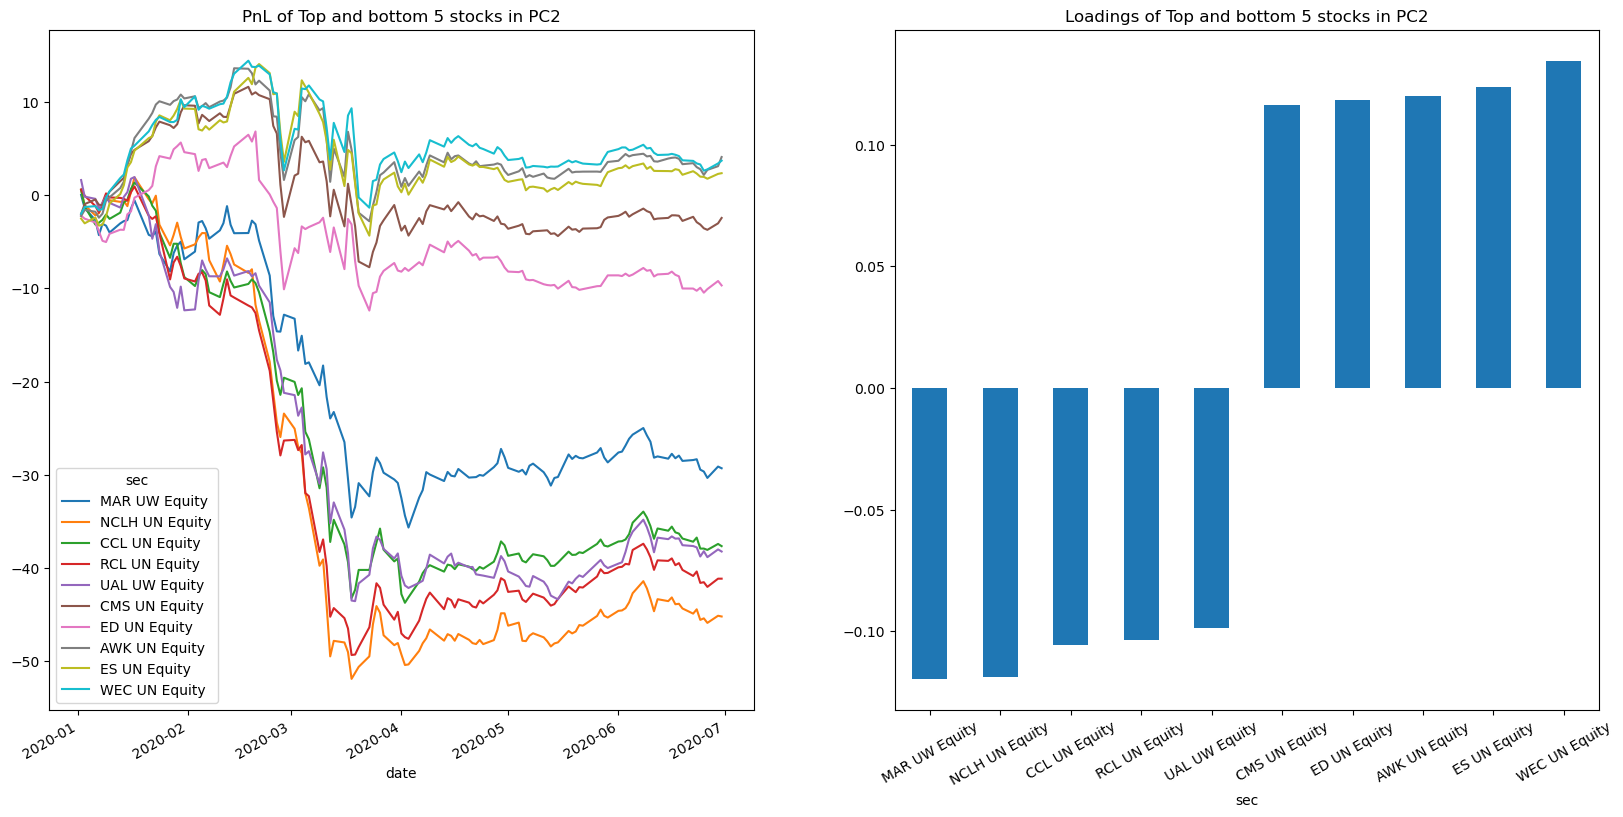

In [34]:
pc = 2
top_bottom_n = 5
title=f"Loadings of Top and bottom {top_bottom_n} stocks in PC{pc}"
pc_stocks = eig_vec.loc[pc].sort_values().iloc[np.r_[0:top_bottom_n, -top_bottom_n:0]]

fig, ax = plt.subplots(1, 2, figsize=(20, 10));

pc_stocks.plot.bar(title=title, ax=ax[1]);
ax[1].set_xticklabels(labels=pc_stocks.index, rotation=30);

rets_norm.loc[:, pc_stocks.index].cumsum().plot(ax=ax[0], title=f"PnL of Top and bottom {top_bottom_n} stocks in PC{pc}");

<u>Long</u>

Energy: WEC, ES, ED, CMS

Utilities: AWK

<u>Short</u>

Consumer Discretionary: 

1. Cruise: NCLH, RCL, CCL
2. Hotel: MAR
3. Airline: UAL

-> Undoubtedly, the travel industry is much impacted. 

While on the long side, it is well known that many traders speculate on the spread between energy and cruise & airline.

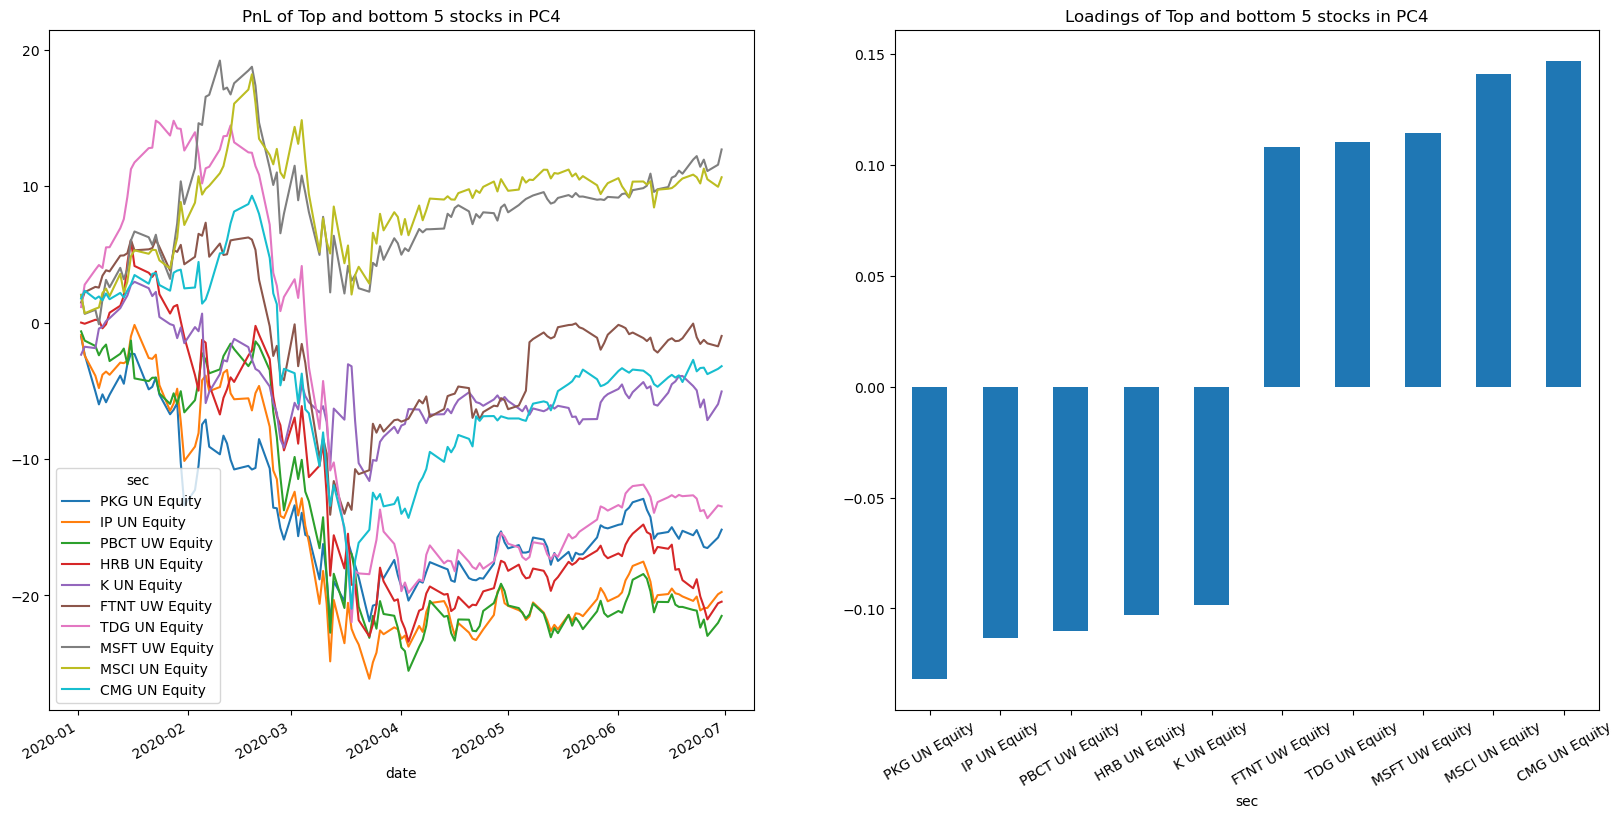

In [36]:
pc = 4
top_bottom_n = 5
title=f"Loadings of Top and bottom {top_bottom_n} stocks in PC{pc}"
pc_stocks = eig_vec.loc[pc].sort_values().iloc[np.r_[0:top_bottom_n, -top_bottom_n:0]]

fig, ax = plt.subplots(1, 2, figsize=(20, 10));

pc_stocks.plot.bar(title=title, ax=ax[1]);
ax[1].set_xticklabels(labels=pc_stocks.index, rotation=30);

rets_norm.loc[:, pc_stocks.index].cumsum().plot(ax=ax[0], title=f"PnL of Top and bottom {top_bottom_n} stocks in PC{pc}");

Similarly, we see packaging sectors are affected, maybe because the transportation of goods are suspended.

Meanwhile, IT firms like MSFT benefit from work from home policy. 

Chipotle also gained because of food delivery demands.